In [5]:
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
df = pd.read_csv('Student_Perfomerce_Data.csv',index_col=0)

In [17]:
df.head(10)

,Student_ID,Topic_1_Questions,Topic_1_Correct,Topic_2_Questions,Topic_2_Correct,Topic_3_Questions,Topic_3_Correct,Topic_4_Questions,Topic_4_Correct,Topic_5_Questions,Topic_5_Correct,Total_Correct,Total_Questions
0,Student_1,5,3,5,3,5,0,10,9,10,0,15,35
1,Student_2,8,1,5,4,6,6,8,8,9,8,27,36
2,Student_3,8,7,10,0,7,3,6,3,5,3,16,36
3,Student_4,5,1,10,3,10,8,7,5,5,4,21,37
4,Student_5,5,5,6,4,7,5,8,4,9,8,26,35
5,Student_6,6,3,9,8,9,9,9,3,5,2,25,38
6,Student_7,10,5,5,1,8,7,10,1,8,2,16,41
7,Student_8,9,1,9,0,9,6,7,2,7,6,15,41
8,Student_9,10,3,5,4,10,2,8,7,8,6,22,41
9,Student_10,7,5,8,2,6,5,9,0,9,0,12,39


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Student_ID         100 non-null    object
 1   Topic_1_Questions  100 non-null    int64 
 2   Topic_1_Correct    100 non-null    int64 
 3   Topic_2_Questions  100 non-null    int64 
 4   Topic_2_Correct    100 non-null    int64 
 5   Topic_3_Questions  100 non-null    int64 
 6   Topic_3_Correct    100 non-null    int64 
 7   Topic_4_Questions  100 non-null    int64 
 8   Topic_4_Correct    100 non-null    int64 
 9   Topic_5_Questions  100 non-null    int64 
 10  Topic_5_Correct    100 non-null    int64 
 11  Total_Correct      100 non-null    int64 
 12  Total_Questions    100 non-null    int64 
dtypes: int64(12), object(1)
memory usage: 10.9+ KB


In [156]:
df['Total_Percentage'] = (df['Total_Correct'] / df['Total_Questions']) * 100
df['Topic_1_Percentage'] = (df['Topic_1_Correct'] / df['Topic_1_Questions']) * 100
df['Topic_2_Percentage'] = (df['Topic_2_Correct'] / df['Topic_2_Questions']) * 100
df['Topic_3_Percentage'] = (df['Topic_3_Correct'] / df['Topic_3_Questions']) * 100
df['Topic_4_Percentage'] = (df['Topic_4_Correct'] / df['Topic_4_Questions']) * 100
df['Topic_5_Percentage'] = (df['Topic_5_Correct'] / df['Topic_5_Questions']) * 100

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Student_ID          100 non-null    object 
 1   Topic_1_Questions   100 non-null    int64  
 2   Topic_1_Correct     100 non-null    int64  
 3   Topic_2_Questions   100 non-null    int64  
 4   Topic_2_Correct     100 non-null    int64  
 5   Topic_3_Questions   100 non-null    int64  
 6   Topic_3_Correct     100 non-null    int64  
 7   Topic_4_Questions   100 non-null    int64  
 8   Topic_4_Correct     100 non-null    int64  
 9   Topic_5_Questions   100 non-null    int64  
 10  Topic_5_Correct     100 non-null    int64  
 11  Total_Correct       100 non-null    int64  
 12  Total_Questions     100 non-null    int64  
 13  Total_Percentage    100 non-null    float64
 14  Topic_1_Percentage  100 non-null    float64
 15  Topic_2_Percentage  100 non-null    float64
 16  Topic_3_P

In [41]:
df[df['Total_Percentage'] == df['Total_Percentage'].max()]

,Student_ID,Topic_1_Questions,Topic_1_Correct,Topic_2_Questions,Topic_2_Correct,Topic_3_Questions,Topic_3_Correct,Topic_4_Questions,Topic_4_Correct,Topic_5_Questions,Topic_5_Correct,Total_Correct,Total_Questions,Percentage,Total_Percentage
49,Student_50,9,7,8,8,8,5,10,9,7,7,36,42,85.714286,85.714286


Text(0.5, 1.0, 'Distribution of Student Percentages')

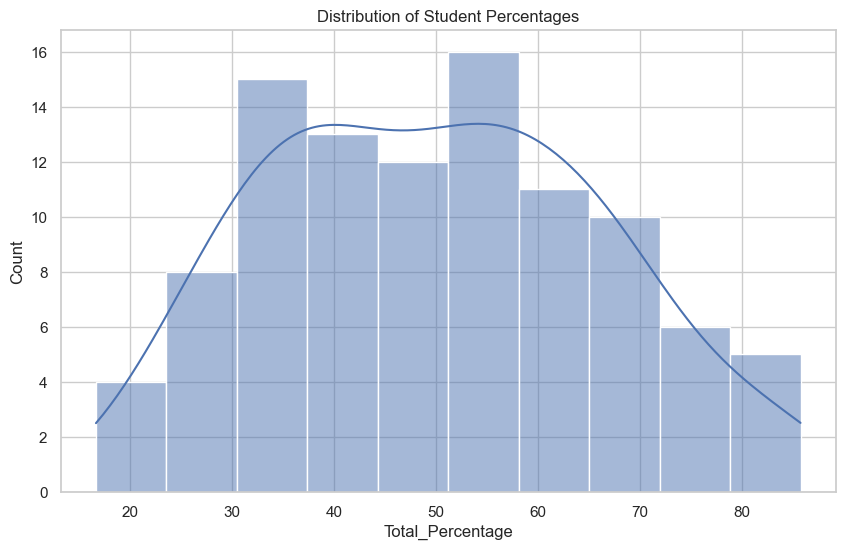

In [42]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=df, x="Total_Percentage", bins=10, kde=True, ax=ax)
ax.set_xlabel("Total_Percentage")
ax.set_ylabel("Count")
ax.set_title("Distribution of Student Percentages")


In [50]:
# Define the weakness threshold
weakness_threshold = 60

for topic in range(1, num_topics + 1):
    topic_label_col = f"Topic_{topic}_Weak_Label"
    
    
    weak_topic_mask = df[f"Topic_{topic}_Percentage"] < weakness_threshold
    df[topic_label_col] = weak_topic_mask.astype(int)


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Student_ID          100 non-null    object 
 1   Topic_1_Questions   100 non-null    int64  
 2   Topic_1_Correct     100 non-null    int64  
 3   Topic_2_Questions   100 non-null    int64  
 4   Topic_2_Correct     100 non-null    int64  
 5   Topic_3_Questions   100 non-null    int64  
 6   Topic_3_Correct     100 non-null    int64  
 7   Topic_4_Questions   100 non-null    int64  
 8   Topic_4_Correct     100 non-null    int64  
 9   Topic_5_Questions   100 non-null    int64  
 10  Topic_5_Correct     100 non-null    int64  
 11  Total_Correct       100 non-null    int64  
 12  Total_Questions     100 non-null    int64  
 13  Total_Percentage    100 non-null    float64
 14  Topic_1_Percentage  100 non-null    float64
 15  Topic_2_Percentage  100 non-null    float64
 16  Topic_3_P

In [55]:
from sklearn.model_selection import train_test_split

In [77]:
X = df[['Topic_1_Percentage', 'Topic_2_Percentage', 'Topic_3_Percentage', 'Topic_4_Percentage', 'Topic_5_Percentage']]
Y = df[['Topic_1_Weak_Label', 'Topic_2_Weak_Label', 'Topic_3_Weak_Label', 'Topic_4_Weak_Label', 'Topic_5_Weak_Label']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [97]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [112]:
dtree = DecisionTreeClassifier()
knn = KNeighborsClassifier()
rfc = RandomForestClassifier()

In [115]:
dtree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [116]:
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [139]:
rfc.fit(X_train, Y_train)

RandomForestClassifier()

In [140]:
dtree_predictions = dtree.predict(X_test)
knn_predictions = knn.predict(X_test)
rfc_predictions = rfc.predict(X_test)

In [141]:
dtree_accuracy = dtree.score(X_test, Y_test)
knn_accuracy = knn.score(X_test, Y_test)
rfc_accuracy = rfc.score(X_test, Y_test)

In [142]:
dtree_accuracy

0.75

In [143]:
knn_accuracy

0.55

In [144]:
rfc_accuracy

0.9

In [145]:
from sklearn.metrics import classification_report,confusion_matrix

In [147]:
print(classification_report(Y_test,dtree_predictions))
print('\n')
print(classification_report(Y_test,knn_predictions))
print('\n')
print(classification_report(Y_test,rfc_predictions))
print('\n')

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      1.00      1.00         9
           2       0.85      1.00      0.92        11
           3       1.00      1.00      1.00        12
           4       1.00      0.80      0.89        10

   micro avg       0.94      0.96      0.95        53
   macro avg       0.95      0.96      0.95        53
weighted avg       0.95      0.96      0.95        53
 samples avg       0.95      0.97      0.95        53



              precision    recall  f1-score   support

           0       1.00      0.82      0.90        11
           1       0.70      0.78      0.74         9
           2       1.00      0.91      0.95        11
           3       1.00      0.92      0.96        12
           4       0.82      0.90      0.86        10

   micro avg       0.90      0.87      0.88        53
   macro avg       0.90      0.86      0.88        53
weighted avg       0.

In [173]:
new_df = pd.read_csv('Student_Perfomerce_Test_Data.csv',index_col=0)

In [174]:
new_df['Total_Percentage'] = (new_df['Total_Correct'] / new_df['Total_Questions']) * 100
new_df['Topic_1_Percentage'] = (new_df['Topic_1_Correct'] / new_df['Topic_1_Questions']) * 100
new_df['Topic_2_Percentage'] = (new_df['Topic_2_Correct'] / new_df['Topic_2_Questions']) * 100
new_df['Topic_3_Percentage'] = (new_df['Topic_3_Correct'] / new_df['Topic_3_Questions']) * 100
new_df['Topic_4_Percentage'] = (new_df['Topic_4_Correct'] / new_df['Topic_4_Questions']) * 100
new_df['Topic_5_Percentage'] = (new_df['Topic_5_Correct'] / new_df['Topic_5_Questions']) * 100

In [175]:
# Define the weakness threshold
weakness_threshold = 60

for topic in range(1, num_topics + 1):
    topic_label_col = f"Topic_{topic}_Weak_Label"
    
    
    weak_topic_mask = new_df[f"Topic_{topic}_Percentage"] < weakness_threshold
    new_df[topic_label_col] = weak_topic_mask.astype(int)


In [181]:
X_new = new_df[['Topic_1_Percentage', 'Topic_2_Percentage', 'Topic_3_Percentage', 'Topic_4_Percentage', 'Topic_5_Percentage']]


In [182]:
X_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Topic_1_Percentage  1000 non-null   float64
 1   Topic_2_Percentage  1000 non-null   float64
 2   Topic_3_Percentage  1000 non-null   float64
 3   Topic_4_Percentage  1000 non-null   float64
 4   Topic_5_Percentage  1000 non-null   float64
dtypes: float64(5)
memory usage: 46.9 KB


In [183]:
predictions = rfc.predict(X_new)

In [184]:
# Assuming you have a new dataset X_new and predictions stored in the variable 'predictions'
# Iterate through the predictions and analyze the weak topics
for i, prediction in enumerate(predictions):
    weak_topics = []
    for j, label in enumerate(prediction):
        if label == 1:
            weak_topics.append(f"Topic {j+1}")
    print(f"Student {i+1} should focus on the following weak topics: {', '.join(weak_topics)}")


Student 1 should focus on the following weak topics: Topic 1, Topic 3, Topic 4
Student 2 should focus on the following weak topics: Topic 1, Topic 2, Topic 5
Student 3 should focus on the following weak topics: Topic 1, Topic 2, Topic 3, Topic 4
Student 4 should focus on the following weak topics: Topic 1, Topic 4
Student 5 should focus on the following weak topics: Topic 1, Topic 2
Student 6 should focus on the following weak topics: Topic 2, Topic 3, Topic 4, Topic 5
Student 7 should focus on the following weak topics: Topic 1, Topic 2
Student 8 should focus on the following weak topics: Topic 2, Topic 4, Topic 5
Student 9 should focus on the following weak topics: Topic 1, Topic 4, Topic 5
Student 10 should focus on the following weak topics: Topic 2, Topic 4, Topic 5
Student 11 should focus on the following weak topics: Topic 3
Student 12 should focus on the following weak topics: Topic 1, Topic 2, Topic 5
Student 13 should focus on the following weak topics: Topic 1, Topic 2, Topi